# I. Introduction

## Problem

### Background

## 🧠 What is HR Analytics?

**HR Analytics** is the process of analyzing human resources data to improve organizational performance. It involves examining talent, current employees, and job candidates to generate objective, measurable insights into how human capital contributes to organizational success.

Organizational performance is strongly tied to the **quality and stability of its workforce**. One of the biggest challenges in HR management is **employee attrition**, which brings significant negative impacts such as:

- 💸 **Training costs** and onboarding time for new hires  
- 🧠 Loss of **experience and productivity**  
- 📉 Decline in **team morale and overall performance**  
- 💼 Disruption to a stable **working environment**


## 🔍 Why is HR Analytics Important?

By leveraging HR analytics, organizations can:

- 📊 Identify **patterns among employees at risk of leaving**  
- 🤝 Take **proactive and human-centered actions**, such as informal check-ins or stay interviews  
- 🛠️ Perform **root cause analysis** and implement systemic improvements like career development paths, role rotation, or reward systems

> With this approach, HR transforms from being reactive to turnover into a **strategic partner** for improving retention and organizational productivity.

### 🧩 Problem Statement

Develop a classification model to predict employee attrition using HR analytics. The model is considered successful if it can detect at least **80% of employees who leave** (recall ≥ 0.80), enabling HR to make **proactive, data-driven decisions**. The project is expected to be completed within a **one-week timeline**, with a target deadline of **June 18, 2025**.

### 🎯 Evaluation Metric
The primary evaluation metric used is **Recall**, as the main objective is to detect employees who are likely to leave.  
Recall is the most suitable metric in this context because:

- It focuses on minimizing **False Negatives** (i.e., employees predicted to stay but actually leave).  
- High recall ensures **better coverage of at-risk employees**, which is crucial for retention strategies.

## Dataset

### Reference

File    : dataset.csv

Source  : https://www.kaggle.com/code/faressayah/ibm-hr-analytics-employee-attrition-performance

### Description

| **Column** | **Type** | **Description** |
|------------|----------|-----------------|
| Age | Numeric | Employee’s age |
| Attrition | Categorical (nominal) | Whether the employee left the company |
| BusinessTravel | Categorical (nominal) | Frequency of business travel |
| DailyRate | Numeric | Daily internal rate or cost estimate |
| Department | Categorical (nominal) | Department the employee works in |
| DistanceFromHome | Numeric | Distance from home to office |
| Education | Categorical (ordinal) | Education level (1–5): 1=High School, 5=Doctorate |
| EducationField | Categorical (nominal) | Field of education |
| EmployeeNumber | Numeric (ID) | Unique employee ID |
| EnvironmentSatisfaction | Categorical (ordinal) | Satisfaction with the work environment (1–4) |
| Gender | Categorical (nominal) | Gender (Female, Male) |
| HourlyRate | Numeric | Hourly rate or estimate |
| JobInvolvement | Categorical (ordinal) | Level of job involvement (1–4) |
| JobLevel | Categorical (ordinal) | Job seniority level (1–5) |
| JobRole | Categorical (nominal) | Job role title (e.g., Sales Executive, Manager) |
| JobSatisfaction | Categorical (ordinal) | Job satisfaction (1–4) |
| MaritalStatus | Categorical (nominal) | Marital status (Single, Married, Divorced) |
| MonthlyIncome | Numeric | Monthly salary |
| MonthlyRate | Numeric | Monthly project cost allocation |
| NumCompaniesWorked | Numeric | Number of previous employers |
| OverTime | Categorical (nominal) | Whether the employee works overtime |
| Over18 | Categorical | Whether employee is over 18 (Y/N) |
| PercentSalaryHike | Numeric | Percentage of last salary increase |
| PerformanceRating | Categorical (ordinal) | Performance rating (3=Good, 4=Excellent) |
| RelationshipSatisfaction | Categorical (ordinal) | Satisfaction with work relationships (1–4) |
| StockOptionLevel | Categorical (ordinal) | Stock option level (0–3) |
| TotalWorkingYears | Numeric | Total years of work experience |
| TrainingTimesLastYear | Numeric | Number of trainings in the past year |
| WorkLifeBalance | Categorical (ordinal) | Work-life balance score (1–4) |
| YearsAtCompany | Numeric | Years spent at the current company |
| YearsInCurrentRole | Numeric | Years in current role |
| YearsSinceLastPromotion | Numeric | Years since last promotion |
| YearsWithCurrManager | Numeric | Years working with the current manager |

# II. Import Library

All libraries that will be used are collected in this section

In [ ]:
# Import all libraries that will be used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import recall_score

# III. Data Loading

Data loading is the process of loading data, cleaning it, and understanding the structure and general information about the data.

In [ ]:
# Process of loading data into a dataframe df
df = pd.read_csv('dataset.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Displays a summary of dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Structurally there are no data type errors, there is no None data, Column naming uses Pascal case

In [ ]:
# Displays statistical descriptions of numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


It is necessary to pay attention to several columns that have a variation of 0 because they contain only one data (EmployeeCount, StandardHours), a small min max range indicates that the data is not numeric, but is categorical such as (Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, WorkLifeBalance), the value needs to be seen again in feature engineering to cross check again.

In [ ]:
# Categorical data description
df.describe(include=['O']).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


Attrition here forgets the predicted label, all data here is strings that are certain to be categorical data. Over18 has only one data type

In [ ]:
# Duplicate the dataframe as a data backup
df_copy = df.copy()

# IV Exploratory Data Analysis

Here we will find patterns in data through visualization and reveal hidden secrets through graphs, analysis, and diagrams.

**Data without analysis is just noise.**

## Is income the main reason for someone to leave?

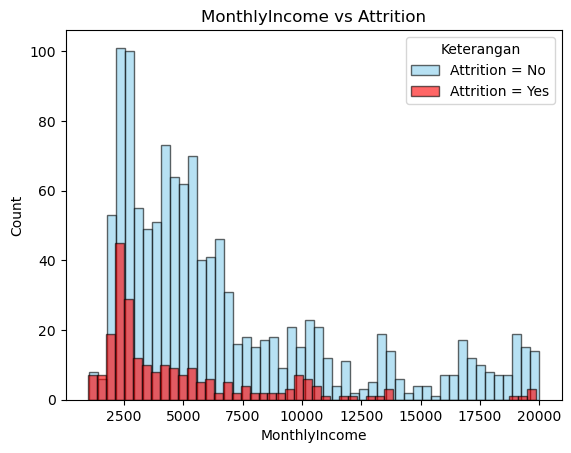

In [ ]:
# Table filter
attrition_yes = df[df['Attrition'] == 'Yes']['MonthlyIncome']
attrition_no = df[df['Attrition'] == 'No']['MonthlyIncome']

# Creating a histogram visualization
plt.hist(attrition_no, bins=50, color='skyblue', edgecolor='black', alpha=0.6, label='Attrition = No')
plt.hist(attrition_yes, bins=50, color='red', edgecolor='black', alpha=0.6, label='Attrition = Yes')
plt.title('MonthlyIncome vs Attrition')
plt.xlabel('MonthlyIncome')
plt.ylabel('Count')
plt.legend(title='Keterangan')
plt.show()

**Analysis:**  Employees with a **monthly income below 6,000** tend to have a **higher attrition rate**, likely due to the pursuit of better-paying opportunities. This suggests that **low-income employees are more likely to leave** for financial reasons.

Interestingly, there is a **small spike in attrition around the 10,000 mark**, which may indicate that **mid-level earners** are also seeking to improve their standard of living or aiming for higher career advancement.

> This insight highlights the importance of income satisfaction as a potential driver of employee turnover.


## Does a bad work environment affect employee turnover?

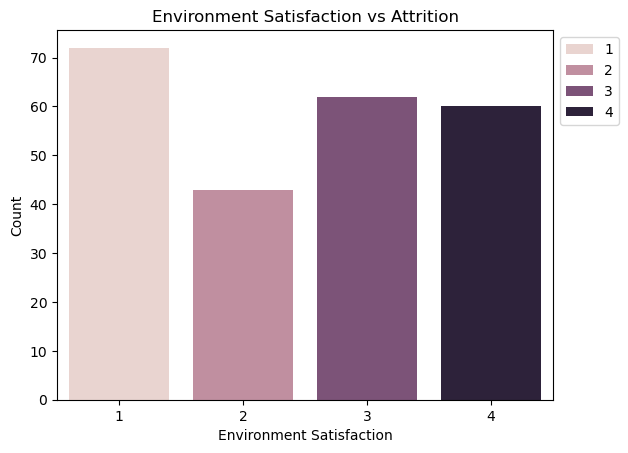

In [ ]:
# Filter and count the amount of data
envi = df[df['Attrition'] == 'Yes']
envi_count = envi.groupby('EnvironmentSatisfaction')['Attrition'].count().reset_index(name='count_enviroment')

# Creating a barplot visualization
sns.barplot(data=envi_count, x='EnvironmentSatisfaction', y='count_enviroment', hue='EnvironmentSatisfaction')
plt.title('Environment Satisfaction vs Attrition')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.show()

information :
- Low : 1
- Medium : 2
- High : 3
- Very High : 4

**Analysis:**  Approximately **70 employees who left the company reported low environment satisfaction**, indicating that a **poor work environment** can be a strong factor in employee turnover.

Interestingly, attrition is also observed among those who reported **high or very high satisfaction** with their environment. This suggests that even in **comfortable or overly stable environments**, some employees may leave in search of **new challenges or growth opportunities**.

> A good environment is important, but not always enough to retain employees who seek continuous development or stimulation.


## Which department does the most people leave?

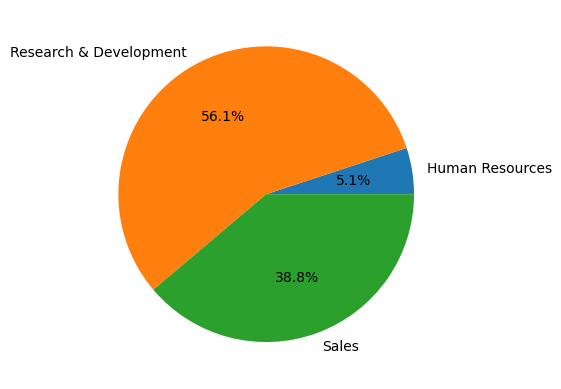

In [ ]:
# Filter and count the amount of data
department = df[df['Attrition'] == 'Yes']
department_count = department.groupby('Department')['Attrition'].count().reset_index(name='count_departement')

# Creating a barplot visualization
plt.pie(x = department_count['count_departement'], labels =department_count['Department'], autopct='%1.1f%%') 
plt.show()

**Analysis:**  Unfortunately, the dataset includes only **three departments** for analysis. However, among employees who left the company, the **highest attrition rates are observed in the R&D and Sales departments**. This could be due to the **high-pressure nature of target-driven roles** in these areas, leading to increased stress and burnout.

In contrast, the **Human Resources department** shows the **lowest attrition**, likely because it primarily involves **administrative tasks** with relatively lower work intensity and performance pressure.

> This suggests that job nature and workload significantly influence employee retention across departments.


## How does the current work duration impact employee turnover?

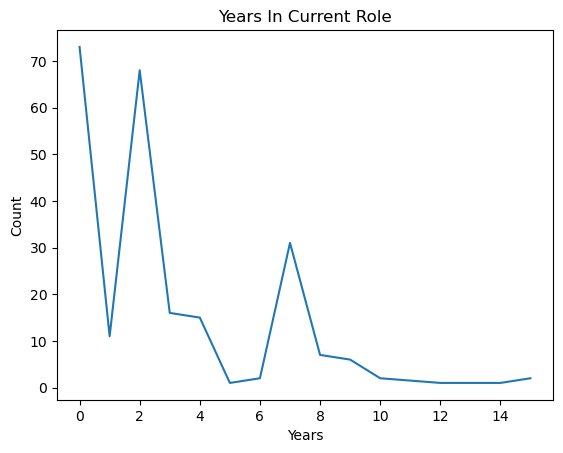

In [ ]:
# Filter and count the amount of data
duration = df[df['Attrition'] == 'Yes']
duration_count = duration.groupby('YearsInCurrentRole')['Attrition'].count().reset_index(name='Count_YearsInCurrentRole')

# Visualization with lineplot
sns.lineplot(x=duration_count['YearsInCurrentRole'], y=duration_count['Count_YearsInCurrentRole'])
plt.title('Years In Current Role')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

**Analysis:**  Employees with **less than 1 year of tenure** show a **high attrition rate**, likely due to the challenges of onboarding and adjusting to the company culture. This period is often marked by uncertainty and potential **early mismatch** between employee expectations and the actual work environment.

Attrition then **decreases after the first year**, but **rises again around the second year**, possibly due to **one-year contract expirations** or reassessments of long-term fit.

After the second year, attrition tends to **decline steadily**, indicating growing stability and job satisfaction. However, there is **another spike around year 7**, likely because **experienced employees begin seeking new opportunities** for growth or advancement outside the company.

> Employee attrition appears to follow distinct phases: early mismatch, contract-based exits, stabilization, and mid-career mobility.


## Do people resign because of the long distance from home?

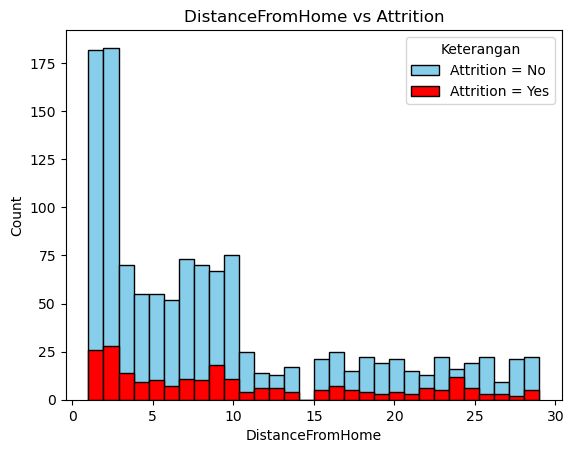

In [ ]:
# Data filters
attrition_yes = df[df['Attrition'] == 'Yes']['DistanceFromHome']
attrition_no = df[df['Attrition'] == 'No']['DistanceFromHome']

# Creating a histogram visualization
plt.hist(attrition_no, bins=30, color='skyblue', edgecolor='black', alpha=1, label='Attrition = No')
plt.hist(attrition_yes, bins=30, color='red', edgecolor='black', alpha=1, label='Attrition = Yes')
plt.title('DistanceFromHome vs Attrition')
plt.xlabel('DistanceFromHome')
plt.ylabel('Count')
plt.legend(title='Keterangan')
plt.show()

**Analysis:**  Distance from home does not appear to have a strong influence on employee attrition in this company. Interestingly, attrition is relatively **high for employees living within 1–2 km**, but this is likely due to the **higher concentration of employees living at that distance**, rather than distance being a causal factor.

It’s also important to note that the dataset is **imbalanced** between employees who stayed and those who left, which may affect the interpretation of this feature.

> In this case, proximity to the workplace is **not a significant driver** of employee turnover.


## Is worklife balance a problem?

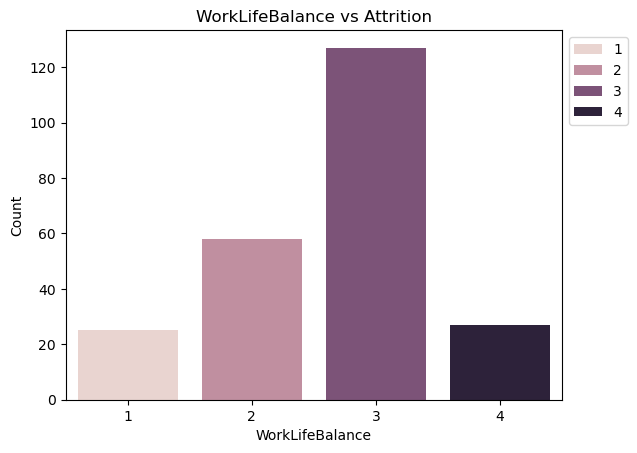

In [ ]:
# Data filter and grouping
worklifebalance = df[df['Attrition'] == 'Yes']
worklifebalance_count = worklifebalance.groupby('WorkLifeBalance')['Attrition'].count().reset_index(name='count_WorkLifeBalance')

# Creating visualizations with barplots
sns.barplot(data=worklifebalance_count, x='WorkLifeBalance', y='count_WorkLifeBalance', hue='WorkLifeBalance')
plt.title('WorkLifeBalance vs Attrition')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('WorkLifeBalance')
plt.ylabel('Count')
plt.show()

Information :
- Low : 1
- Medium : 2
- High : 3
- Very High : 4

**Analysis:**  Interestingly, both **low and high work-life balance ratings** are associated with **lower attrition rates**.

- Employees with **low work-life balance** may be more focused on their work and may have already adapted to the demands of the job, reducing the likelihood of leaving.  
- On the other hand, employees with a **moderate work-life balance** might still seek better conditions elsewhere, which can explain the **increase in attrition in the middle range**.  
- When work-life balance reaches a **very high level**, employees tend to feel satisfied, and **attrition drops again**.

> This suggests that perceived balance alone is not the only factor—**expectation and personal ambition** may also influence turnover behavior.


## Are salary increases effective in keeping employees?

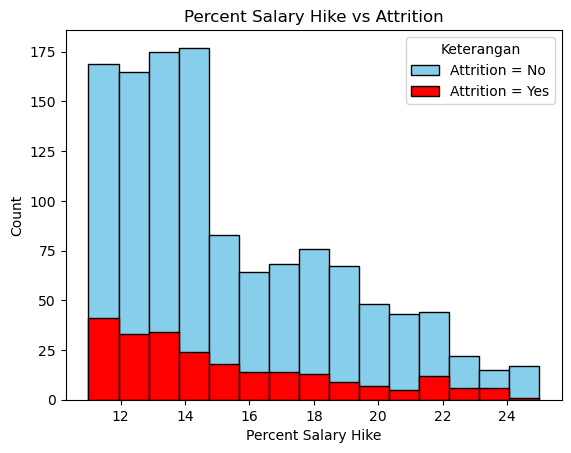

In [ ]:
# Data filters
attrition_yes = df[df['Attrition'] == 'Yes']['PercentSalaryHike']
attrition_no = df[df['Attrition'] == 'No']['PercentSalaryHike']

# Creating visualizations with histograms
plt.hist(attrition_no, bins=15, color='skyblue', edgecolor='black', alpha=1, label='Attrition = No')
plt.hist(attrition_yes, bins=15, color='red', edgecolor='black', alpha=1, label='Attrition = Yes')
plt.title('Percent Salary Hike vs Attrition')
plt.xlabel('Percent Salary Hike')
plt.ylabel('Count')
plt.legend(title='Keterangan')
plt.show()

**Analysis:**  A **higher percentage of salary increase** appears to **motivate employees to stay** with the company. This can be observed in the trend where **attrition rates decrease as salary hike percentages increase**.

Employees who receive significant salary increases may feel more **valued and financially secure**, reducing their intent to seek opportunities elsewhere.

> Compensation plays a key role in retention—**rewarding performance with meaningful salary adjustments** can lower the risk of attrition.


# V. Feature Engineering

Feature engineering is all processes for handling sequences (features) so that they are relevant to the model.

## Handling Duplicate

Duplicate data should be removed because it can cause data redundancy and the model only memorizes the data and does not find patterns.

In [14]:
# Drop data duplicate
df = df.drop_duplicates()

## Change label

The label data is still in the Yes and No string format and will be replaced so that it can be run in the modeling with scikit-learn.

In [15]:
# Before
df["Attrition"].head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [16]:
# Pergantian label ke angka dengan label encoder
label = LabelEncoder()
df["Attrition"] = label.fit_transform(df["Attrition"])

# After
df["Attrition"].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

## Handling Cardinality

Cardinality is a unique value that is owned by a data. Few unique values ​​indicate the type is included in the categorical type, it is important to know the data type so that the model is relevant, to check it you can understand the data and see the number of unique data owned by each column

### Define Column

This definition is by looking at the explanation related to the data owned.

| **Kolom**                | **Tipe**                  | **Jenis Encoding**     |
| ------------------------ | ------------------------- | ---------------------- |
| BusinessTravel           | Categorical (ordered)     | Ordinal encoding       |
| Department               | Categorical (not ordered) | One-hot encoding       |
| Education                | Categorical (ordered)     | Ordinal encoding       |
| EducationField           | Categorical (not ordered) | One-hot encoding       |
| EnvironmentSatisfaction  | Categorical (ordered)     | Ordinal encoding       |
| Gender                   | Categorical (not ordered) | One-hot encoding       |
| JobInvolvement           | Categorical (ordered)     | Ordinal encoding       |
| JobLevel                 | Categorical (ordered)     | Ordinal encoding       |
| JobRole                  | Categorical (not ordered) | One-hot encoding       |
| JobSatisfaction          | Categorical (ordered)     | Ordinal encoding       |
| MaritalStatus            | Categorical (not ordered) | One-hot encoding       |
| OverTime                 | Categorical (not ordered) | One-hot encoding       |
| PerformanceRating        | Categorical (ordered)     | Ordinal encoding       |
| RelationshipSatisfaction | Categorical (ordered)     | Ordinal encoding       |
| StockOptionLevel         | Categorical (ordered)     | Ordinal encoding       |
| WorkLifeBalance          | Categorical (ordered)     | Ordinal encoding       |


Data will be divided and defined based on its type. This definition is important for use in various processes that request numeric or categorical data types.

In [ ]:
# Creating categorical column data
ordinal_column = ['BusinessTravel','Education','EnvironmentSatisfaction','PerformanceRating','JobInvolvement','JobLevel','JobSatisfaction','RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
onehot_column = ['Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
categorical_column = ordinal_column + onehot_column

# Creating numeric column data
numerical_column = list(df.select_dtypes(include='number').drop(columns=categorical_column, errors='ignore'))
numerical_column.remove('StandardHours')
numerical_column.remove('EmployeeCount')
numerical_column.remove('EmployeeNumber')

As explained in the data loading StandardHours and EmployeeCount are only one data that has no variation so it becomes useless when used, so the column will be deleted because it is not used. EmployeeNumber is a unique employee ID, it is useless for modeling and can cause the model to misjudge so it will be deleted. Column Over18 data string only contains the value Y, this column is administrative which shows all employees are over 18 years old and are said to be adults, this column will not be used because it is not informative

### View Cardinality Data Category

Displaying categorical data for cross validation

In [ ]:
# Displays columns, number of unique data, and unique data
pd.set_option('display.max_colwidth', None)
list_ordinality = []
for col in categorical_column:
    list_ordinality.append([col, df[col].nunique(), df[col].unique()])
pd.DataFrame(columns=['column','value_counts', 'unique_value'], data=list_ordinality)

,column,value_counts,unique_value
0,BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
1,Education,5,"[2, 1, 4, 3, 5]"
2,EnvironmentSatisfaction,4,"[2, 3, 4, 1]"
3,PerformanceRating,2,"[3, 4]"
4,JobInvolvement,4,"[3, 2, 4, 1]"
5,JobLevel,5,"[2, 1, 3, 4, 5]"
6,JobSatisfaction,4,"[4, 2, 3, 1]"
7,RelationshipSatisfaction,4,"[1, 4, 2, 3]"
8,StockOptionLevel,4,"[0, 1, 3, 2]"
9,WorkLifeBalance,4,"[1, 3, 2, 4]"


For performance rating, it is usually in the range of 1-4, but in this dataset it is only in 3-4, if inference is done with other data, the model may not recognize it, as well as department and jobrole data. All data in validation is category data with a few unique values

## Correlation Matrics

Correlation has various tests that have advantages and disadvantages in general chi-square is tested for category data with categories, categories with numerics can use kendals.

Correlation hypothesis:

H0: There is a correlation (p-value <= 0.05)

H1: There is no correlation (p-value> 0.05)

In [ ]:
# Save chi square correlation value
list_corr_chi = []
# Save Kendals correlation value
list_corr = []

# Looping to fill the correlation list
for col in list(df.columns):
    if col in categorical_column and col != 'Attrition':
        contingency_table = pd.crosstab(df[col], df['Attrition'])
        corr, p, dof, expected = stats.chi2_contingency(contingency_table)
        if p <= 0.05:
            h = 'correlation'
        else:
            h = "don't have correlation"
        list_corr_chi.append([col, p, h])
    else:
        corr, p = stats.kendalltau(df[col], df['Attrition'])
        if p <= 0.05:
            h = 'correlation'
        else:
            h = "don't have correlation"
        list_corr.append([col, p, h])

# Create a dataframe from the list of control correlations
corr = pd.DataFrame(columns=['column','correlation','hipotesis'], data=list_corr)
corr.sort_values(by='correlation',ascending=True  ,inplace=True)
display(corr)

# Create a dataframe from the chi square correlation list
corr_chi = pd.DataFrame(columns=['column','p-value','hipotesis'], data=list_corr_chi)
corr_chi.sort_values(by='p-value',ascending=True  ,inplace=True)
display(corr_chi)

,column,correlation,hipotesis
1,Attrition,0.000000e+00,correlation
13,TotalWorkingYears,2.398012e-14,correlation
7,MonthlyIncome,2.948926e-14,correlation
15,YearsAtCompany,2.914375e-13,correlation
16,YearsInCurrentRole,4.426913e-12,correlation
18,YearsWithCurrManager,1.805706e-11,correlation
0,Age,5.301368e-11,correlation
3,DistanceFromHome,2.386383e-03,correlation
2,DailyRate,2.899843e-02,correlation
17,YearsSinceLastPromotion,4.117047e-02,correlation


,column,p-value,hipotesis
11,OverTime,8.158424e-21,correlation
8,JobRole,2.752482e-15,correlation
7,JobLevel,6.634685e-15,correlation
14,StockOptionLevel,4.379390e-13,correlation
10,MaritalStatus,9.455511e-11,correlation
6,JobInvolvement,2.863181e-06,correlation
0,BusinessTravel,5.608614e-06,correlation
4,EnvironmentSatisfaction,5.123469e-05,correlation
9,JobSatisfaction,5.563005e-04,correlation
15,WorkLifeBalance,9.725699e-04,correlation


**Analysis** So statistically, the p-value shows several features that are not correlated with the attrition target, namely NumCompaniesWorked, PercentSalaryHike, MonthlyRate, HourlyRate, RelationshipSatisfaction, Gender, Education, PerformanceRating

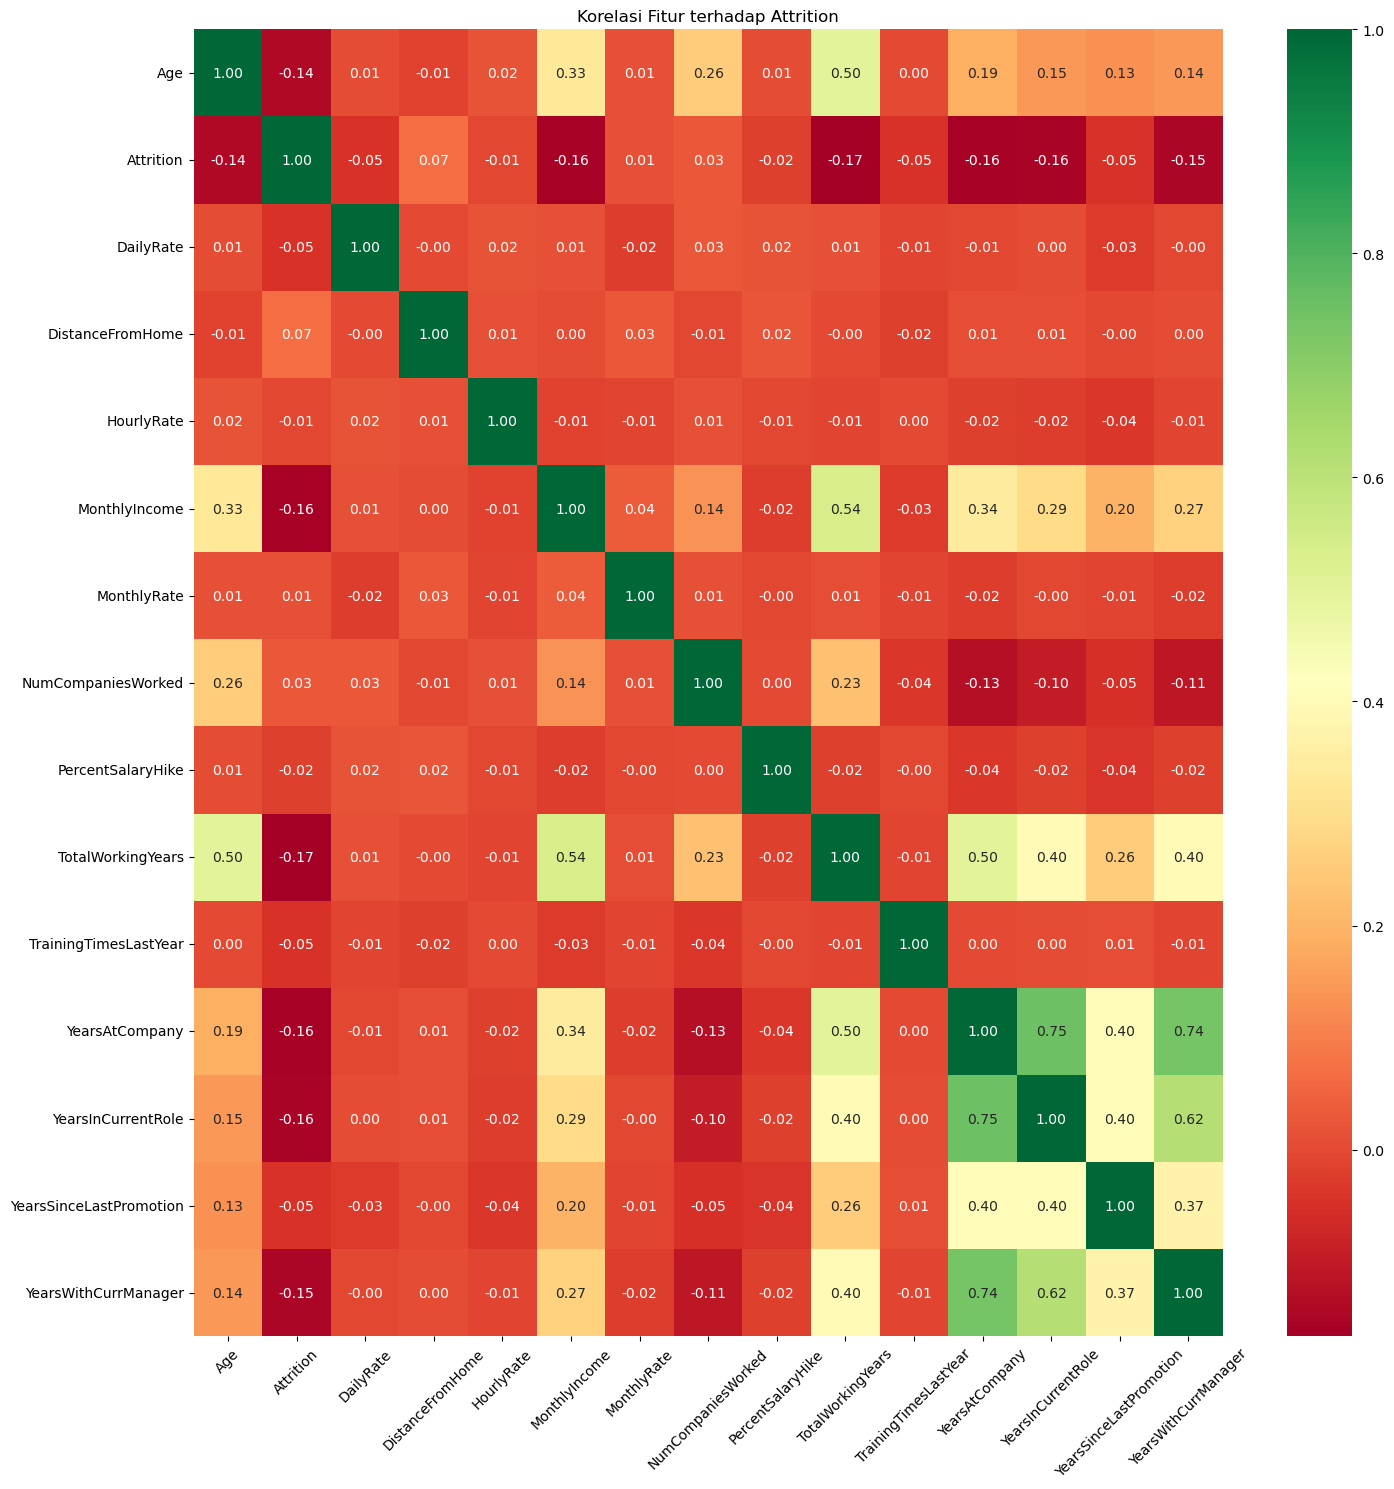

In [ ]:
# To see how strong the relationship is, only on numeric data
plt.figure(figsize=(15, 15))
sns.heatmap(df[numerical_column].corr(method='kendall'), annot=True, cmap='RdYlGn', fmt=".2f")
plt.title("Korelasi Fitur terhadap Attrition")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analysis:** All data related to the year such as age, YearsAtcompany, etc. have a moderate to strong relationship, this is normal because all are affected by the year. Monthly income has a strong effect on the length of time worked, which can be interpreted as monthly salary increases with work experience. While the relationship between Attrition and other variables is very weak to weak

## Split Data Train and Test

Splitting to divide data into train data and test data, train data is used for the machine to learn patterns from its data, to create a model. Test data is used to test the results of the machine pattern, by testing the model to the test data.

In [21]:
# Split feature and target
X_data = df.drop(columns=['Attrition'], axis=1)
y_data = df['Attrition']

# Split data train and test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=9)
print(f'Train size : {X_train.shape}')
print(f'Test size : {X_test.shape}')

Train size : (1176, 34)
Test size : (294, 34)


Proportion of train data division 80%, test data 20%

## Handling Outlier

Outliers are values ​​that deviate significantly from the data distribution. Outliers can occur due to various possibilities, such as human error, sensor error, etc. Outliers must be removed to make statistical results undistorted.

In [ ]:
# Function to output lower and upper outlier values
def outlier(dataframe, series):
    data = dataframe[series]
    skewness = data.skew()
    if -0.5 <= skewness <= 0.5:
        lower = data.mean() - (3 * data.std())
        upper = data.mean() + (3 * data.std())
    else:
        iqr = data.quantile(0.75) -  data.quantile(0.25)
        lower = data.quantile(0.25) - (1.5 * iqr)
        upper = data.quantile(0.75) + (1.5 *iqr)
    return lower, upper

Here using two methods namely turkey's rule and Z-score, assuming if the data is distributed close to normal it will be handled with Z-score because Z-score is good at cutting large variations based on standard variation, if the data is skewed it will be handled with turkey's rule because turkey's rule cuts data based on the interquartile range is suitable for skewed data. Z-score uses 3 times the standard deviation, and turkey's rule uses 1.5 times the iqr.

In [ ]:
# Here it is removed because the label does not need to be handled
numerical_column.remove('Attrition')

# Empty list for outlier data
list_outlier = []

# Empty list for outlier data
for col in numerical_column:
    lower, upper = outlier(X_train, col)
    outlier_data = X_train[(X_train[col] < lower) | (X_train[col] > upper)]
    percentage = (len(outlier_data) / len(X_train[col])) * 100
    list_outlier.append([col, lower, upper, percentage])
    
# Create a dataframe to display
pd.DataFrame(columns=['column', 'lower', 'upper', 'percentage_outlier'], data=list_outlier)

,column,lower,upper,percentage_outlier
0,Age,9.167597,64.580703,0.000000
1,DailyRate,-424.148937,2028.387032,0.000000
2,DistanceFromHome,-16.000000,32.000000,0.000000
3,HourlyRate,4.172091,126.933351,0.000000
4,MonthlyIncome,-4801.250000,15752.750000,8.758503
5,MonthlyRate,-6793.704261,35774.336914,0.000000
6,NumCompaniesWorked,-3.500000,8.500000,3.401361
7,PercentSalaryHike,3.000000,27.000000,0.000000
8,TotalWorkingYears,-7.500000,28.500000,4.506803
9,TrainingTimesLastYear,0.500000,4.500000,15.816327


Outliers have two ways of handling them, namely by deleting them and using the capping method. Both methods have their advantages and disadvantages, such as deleting them will remove information, which may be important information, while capping changes the information and can make the information irrelevant. In this dataset, a threshold of 5% is created, where below 5% is an indication of low-value data and can be deleted. Looking at the outlier percentage, there are 4 features that exceed 5% and 4 features below 5%, because data is an important asset, the capping method will be used on outlier data.

In [ ]:
# List save methods
gaussian_cols = []
iqr_cols = []

# Looping to fill the method column
for col in numerical_column:
    skewness = X_train[col].skew()
    if -0.5 <= skewness <= 0.5:
        gaussian_cols.append(col)
    else:
        iqr_cols.append(col)

# Capping for near normal features
if gaussian_cols:
    winsor_gauss = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=gaussian_cols, missing_values='ignore')
    X_train = winsor_gauss.fit_transform(X_train)

# Capping for skewed features
if iqr_cols:
    winsor_iqr = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=iqr_cols, missing_values='ignore')
    X_train = winsor_iqr.fit_transform(X_train)


If the skewness approaches normal, it will be capped using the Z-score/Gaussian method, whereas if it is skewed, it will use Turkey's rule/IQR.

## Handling Missing Value

Missing values ​​need to be handled and the cause investigated so that the model does not experience errors or mistakes in model interpretation.

In [ ]:
# View the percentage of empty train data
X_train.isnull().mean()*100

Age                         0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInC

In [ ]:
# View the percentage of empty test data
X_test.isnull().mean()*100

Age                         0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtCompany              0.0
YearsInC

Both train and test data did not find any empty data.

## Feature Selection

Feature selection is the process of selecting the most relevant subset of data features from an existing dataset to be used in a machine learning model. Data that will not be used is data that is uncorrelated or considered uninformative.

Unused feature selection:

- MonthlyRate, Not correlated, cost rate can be represented by daily rate
- HourlyRate, Not correlated, cost rate can be represented by daily rate
- PerformanceRating, Not correlated, data only consists of 3-4 majority of high employee assessments, less varied in providing information
- EmployeeCount, number of employees, not informative because there must be only 1 employee who has a unique id
- Over18, Only adult employee administration only 'Y' data, not varied so it does not provide information
- StandardHours, Working hours, not varied so it does not provide information
- EmployeeNumber, unique participant id number is not informative and can mislead the model

Uncorrelated feature selection that is maintained

- NumCompaniesWorked, Not correlated, but will still be used because it affects other features such as Age, MonthlyIncome, TotalWorkingYears. - RelationshipSatisfaction, Not correlated, but will still be used because it describes satisfaction with coworkers.
- Gender, Not correlated, but will still be used because it can describe equality analysis.
- Education, Not correlated, but will still be used because education can impact career aspirations and expectations.

In [ ]:
# Remove unused column features
numerical_column.remove('MonthlyRate')
numerical_column.remove('HourlyRate')
ordinal_column.remove('PerformanceRating')

# Create all the features that will be used
categorical_column = ordinal_column + onehot_column
selected_features = numerical_column + categorical_column

# Filter features of train and test data
X_train = X_train[selected_features]
X_test = X_test[selected_features]

## Scaling

Scaling/normalization is the process of equalizing the scale of features.

In [ ]:
# columns are distributed approximately normally
gaussian_cols

['Age', 'DailyRate', 'HourlyRate', 'MonthlyRate']

In [ ]:
# Skewed distributed columns
iqr_cols

['DistanceFromHome',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Because much of the data is distributed skewed, we use MinMaxScaler because it is sensitive to absolute distance, compared to StandardScaler which is based on linear distance distribution.

In [ ]:
# Save MinMaxScaler method
scale = MinMaxScaler()

## Handling Data Imbalance

Data imbalance needs to be handled so that the machine does not memorize data patterns from the majority of labels.

| Degree of imbalance | Proportion of Minority Class |
| --- | --- |
| Mild | 20-40% of the data set |
| Moderate | 1-20% of the data set |
| Extreme | < 1% of the data set |


In [ ]:
# Calculating the proportion of labels
attraction_yes = y_train[y_train == 1].count()
attraction_no = y_train[y_train == 0].count()
print(f'Amount yes :{attraction_yes}, percentage {(attraction_yes/(y_train.count()))*100}%')
print(f'Amount no :{attraction_no}, percentage {(attraction_no/(y_train.count()))*100}%')

Amount yes :189, percentage 16.071428571428573%
Amount no :987, percentage 83.92857142857143%


Here the minority only has 16% of the data, including moderate, so it is necessary to handle the imbalance.

In [ ]:
# Store column index so that the order is correct in somtenc
ordinal_index = []
onehot_index = []
numerical_index = []
X_train_column = list(X_train.columns)

# Lopping fills the index column
for col in X_train_column:
    if col in ordinal_column:
        ordinal_index.append(X_train.columns.get_loc(col))
    elif col in onehot_column:
        onehot_index.append(X_train.columns.get_loc(col))
    else:
        numerical_index.append(X_train.columns.get_loc(col))

# Final index of categorical column according to position in X_train
categorical_index = ordinal_index + onehot_index

This is important to know the appropriate data index in X_train

In [ ]:
# Save smotenc variable
smotenc = SMOTENC(categorical_features=categorical_index, random_state=9)

## Encoding

Since we already know the type of column to be encoded, here we will only declare the method. Ordinal encoding is used for data that has levels or sequences, while onehot encoding is used for equivalent data.

In [ ]:
# Declare method to variable
ordinal_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

## Transformer

Transformer or preprocessing process is useful for storing scaler methods, encoding, or other methods that change data types. For model selection, the outlier handle will be outside the transformer because it is done manually for deeper analysis.

In [35]:
# Transform
preproses = ColumnTransformer(transformers=[
    ('scaler', scale, numerical_column),
    ('ordinal', ordinal_encoder, ordinal_column),
    ('onehot', onehot_encoder, onehot_column)
], remainder='drop')

Here, use remainder='drop' to delete features that exist but are not used in the preprocessing that has been selected.

# VI. Modeling Definition

Create a base model to validate the recall score

In [ ]:
# Dictionary contains the models used
models = {
    'logreg': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'rf': RandomForestClassifier(),
    'svm': SVC(),
    'tree': DecisionTreeClassifier(),
    'gradient': GradientBoostingClassifier(),
    'adaboost' : AdaBoostClassifier(),
    'hist' : HistGradientBoostingClassifier()
    }

### Finding the Best Model With Cross Validation

Score recall is chosen because the main focus is to find false negatives, or find the scores of all employees who actually leave, how many are detected?

In [ ]:
# The main score sought
scoring = {
    'recall': 'recall',
    'rocauc': 'roc_auc'}

# Save score results
results = {}

# Looping runs
for name, model in models.items():
    # Running a basic model pipeline
    pipeline = ImbPipeline([
        ('smotenc', smotenc),
        ('preproses', preproses),
        ('classifier', model)
    ])

    # Save cross validation values ​​to results dictionary
    scores_train = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)
    scores_test = cross_validate(pipeline, X_test, y_test, scoring=scoring, cv=5, return_train_score=True)
    results[name] = {
        'mean_recall_train': scores_train['train_recall'].mean(),
        'std_recall_train': scores_train['train_recall'].std(),
        'mean_recall_test': scores_test['test_recall'].mean(),
        'std_recall_test': scores_test['test_recall'].std(),}

# Dsiplay
df_results = pd.DataFrame(results).T.sort_values(by='mean_recall_test', ascending=False)
display(df_results)


c:\Users\THINKPAD\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\THINKPAD\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\THINKPAD\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


,mean_recall_train,std_recall_train,mean_recall_test,std_recall_test
logreg,0.670608,0.014082,0.640000,0.125038
hist,1.000000,0.000000,0.504444,0.134733
knn,0.837269,0.020133,0.497778,0.127153
gradient,0.783060,0.015438,0.484444,0.167125
tree,1.000000,0.000000,0.462222,0.150817
rf,1.000000,0.000000,0.460000,0.060287
svm,0.694406,0.034435,0.437778,0.119588
adaboost,0.653346,0.036395,0.400000,0.096097


- Logistic Regression Model results are balanced, no large overfit between train and test
- Decision Tree Model overfits with a large gap
- HistBosst Model overfits with a large gap
- KNN Model moderately overfits
- GradientBosst Model moderately overfits
- RandomForest Model overfits with a large gap
- SVM Model slightly overfits
- AdaBoost Model slightly overfits

In [49]:
df_results = pd.DataFrame(results).T

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_1700\3407578065.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


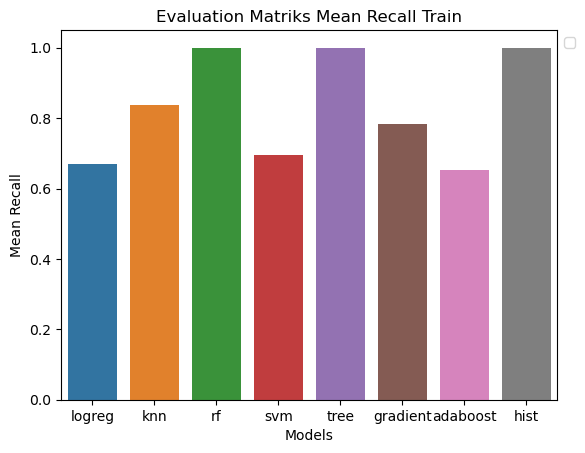

In [ ]:
# Creating a barplot visualization
sns.barplot(data=df_results, x=df_results.index , y='mean_recall_train', hue=df_results.index)
plt.title('Evaluation Matriks Mean Recall Train')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Models')
plt.ylabel('Mean Recall')
plt.show()

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_1700\784439852.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


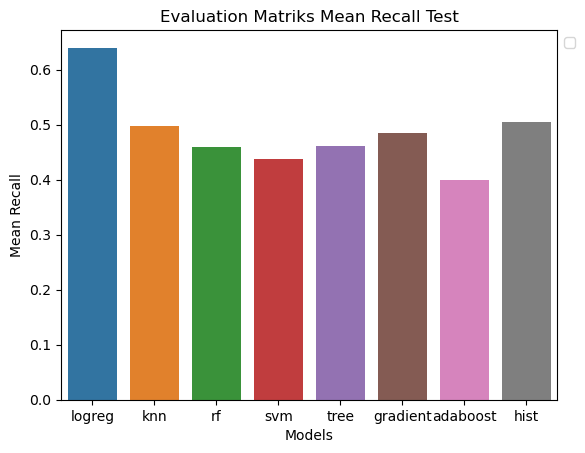

In [ ]:
# Creating a barplot visualization
sns.barplot(data=df_results, x=df_results.index , y='mean_recall_test', hue=df_results.index)
plt.title('Evaluation Matriks Mean Recall Test')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Models')
plt.ylabel('Mean Recall')
plt.show()

The Logistic Regression model shows the most balanced performance without overfitting, because it is simple and suitable for linear data. Meanwhile, Decision Tree, Random Forest, and HistGradientBoosting tend to overfit because they are all based on decision trees that easily capture noise, parameter settings need to be done.

Gradient Boosting is also tree-based but slightly more stable, although it still shows moderate overfitting. KNN and SVM work based on proximity or distance, and the results also show mild overfitting because KNN is sensitive to small data and SVM's parameters are still basic. AdaBoost overfit has not been able to capture patterns so it memorizes more data.

**Conclusion:** The Logistic Regression model is a good model to use in this dataset

#  VII. Model Training

Model training is a step to try hyper parameter tuning, where you try variations of the parameters to get the best results.

In [40]:
# Set parameter
c = [float(x) for x in np.linspace(0.1, 5, 5)]
penalty = ['l1', 'l2', 'elasticnet']
random_state = [10]
solver = ['saga']

# Random search dictionary
params_logreg = {
    'classifier__C': c,
    'classifier__penalty' : penalty,
    'classifier__solver': solver,
    'classifier__l1_ratio': [0.5],
    'classifier__random_state' : random_state}

In [41]:
# Pipeline untuk Logistic regression
pipeline_logreg = ImbPipeline([
    ('smotenc', smotenc),
    ('preproses', preproses),
    ('classifier', LogisticRegression())
])
random = RandomizedSearchCV(estimator=pipeline_logreg, param_distributions=params_logreg, cv=5, scoring='recall', n_iter=100, n_jobs=-1, random_state=10, error_score='raise', verbose=1)
random.fit(X_train, y_train)

c:\Users\THINKPAD\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 15 is smaller than n_iter=100. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\THINKPAD\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('smotenc',
                                              SMOTENC(categorical_features=[12,
                                                                            13,
                                                                            14,
                                                                            15,
                                                                            16,
                                                                            17,
                                                                            18,
                                                                            19,
                                                                            20,
                                                                            21,
                                                                            22,
                                                                            23,
                                                                            24,
                                                                            25,
                                                                            26],
                                                      random_state=9)),
                                             ('preproses',
                                              ColumnTransformer(transformers=[('scaler',
                                                                               MinMaxScaler(),
                                                                               ['Age',
                                                                                'DailyRate',
                                                                                'DistanceFromHome',
                                                                                'MonthlyIncome',
                                                                                'NumCompaniesWorked',
                                                                                'PercentSalaryHike',
                                                                                'TotalWorki...
                                                                                'OverTime'])])),
                                             ('classifier',
                                              LogisticRegression())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'classifier__C': [0.1,
                                                          1.3250000000000002,
                                                          2.5500000000000003,
                                                          3.7750000000000004,
                                                          5.0],
                                        'classifier__l1_ratio': [0.5],
                                        'classifier__penalty': ['l1', 'l2',
                                                                'elasticnet'],
                                        'classifier__random_state': [10],
                                        'classifier__solver': ['saga']},
                   random_state=10, scoring='recall', verbose=1)

In [ ]:
# Best parameter
print(random.best_params_)

{'classifier__solver': 'saga', 'classifier__random_state': 10, 'classifier__penalty': 'elasticnet', 'classifier__l1_ratio': 0.5, 'classifier__C': 0.1}


Best parameters used to get the highest recall score

# VIII. Model Evaluation

Evaluate the model by looking at the recall score and comparing it to the test data.

In [ ]:
# List to store validation results
score_best_model = []

# Save recall results
recall_train = random.best_score_

# Save parameters
model = random.best_estimator_

# Prediction on test data
y_pred_test = model.predict(X_test)
recall_test = recall_score(y_test, y_pred_test)

# Save results to list
score_best_model.append([
    'Losgistic Regression',
    recall_train,
    recall_test
])

# Viewing dataframe
metric_eval = pd.DataFrame(data=score_best_model, columns=['model', 'recall_train', 'recall_test'])
metric_eval

,model,recall_train,recall_test
0,Losgistic Regression,0.650213,0.5625


The results of hyper parameter tuning of the Logistic Regression model, the model is overfit but the gap between train and test is not too large. Based on the purpose of the problem, the model must get a recall test score above 80%, the following model does not meet the objectives, so it cannot be used to predict employees who will leave.

**Suggestion: ** Need to be adjusted again such as adding data for new features, maximizing feature engineering, or maximizing hyper parameter tuning, trying GridSearchCV to get the best results.

# IX. Model Saving

Due to the need for accountability for work and evaluation of input for the team, the best model will still be used for inference in Streamlit. The following is the process of saving the model into PKL format.

In [ ]:
# Model definition
best_model = model

# Save to file
pickle.dump(best_model, open('best_model.pkl', 'wb'))

# X. Inference

Inference is a stage for predicting new data, inference is made in a different notebook file to see the results of loading data, namely in the file : `inference.ipynb`

Inference can also be used to predict data directly by visiting the Huggingface website with the following link:
[Link EDA and Inference](https://huggingface.co/spaces/ifananwar/attrition-classifier)

In [ ]:
# Load model into best_model
with open('best_model.pkl', 'rb') as file:
    best_model = pickle.load(file)

In [ ]:
# Create new employee data
data_inf = {
    'Age' : 41,
    'Attrition' : 1,
    'BusinessTravel' : 'Travel_Rarely',
    'DailyRate' : 1102,
    'Department' : 'Sales',
    'DistanceFromHome' : 1,
    'Education' : 2,
    'EducationField' : 'Life Sciences',
    'EmployeeNumber' : 1,
    'EnvironmentSatisfaction' : 2,
    'Gender' : 'Female',
    'HourlyRate' : 94,
    'JobInvolvement' : 3,
    'JobLevel' : 2,
    'JobRole' : 'Sales Executive',
    'JobSatisfaction' : 4,
    'MaritalStatus' : 'Single',
    'MonthlyIncome' : 6000,
    'MonthlyRate' : 19500,
    'NumCompaniesWorked' : 8,
    'OverTime' : 'Yes',
    'PercentSalaryHike' : 11,
    'PerformanceRating' : 3,
    'RelationshipSatisfaction' : 1,
    'StockOptionLevel' : 0,
    'TotalWorkingYears' : 8,
    'TrainingTimesLastYear' : 0,
    'WorkLifeBalance' : 1,
    'YearsAtCompany' : 6,
    'YearsInCurrentRole' : 4,
    'YearsSinceLastPromotion' : 0,
    'YearsWithCurrManager' : 5
}

# Ubah ke dataframe
data_inf = pd.DataFrame([data_inf])
data_inf

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5


In [ ]:
# Predicting new employee data
y_pred_inf = best_model.predict(data_inf)
y_pred_inf

array([1])

It is found that employees who are predicted to potentially leave the workplace. However, this is not necessarily accurate, someone does not necessarily leave just because they are predicted to leave, therefore the company can conduct stay interviews or job satisfaction questionnaires for these employees.

# XI. ✅ Conclusion

The following key insights and conclusions were drawn from the analysis:

1. **Higher salaries and salary increases** motivate employees to stay longer with the company.
2. A **balanced work environment and moderate work-life balance**—not too poor and not excessively comfortable—helps employees stay focused and reduces their intention to leave.
3. **Departments with high workload and pressure** tend to have higher attrition rates, as employees seek roles with less stress and easier adaptation.
4. Employees are more likely to leave during the **early stage of their career** at a company. However, once they adapt and find stability, they are more likely to stay.
5. There is **no strong relationship** between the distance from home and employee attrition.
6. The best-performing base model was **Logistic Regression**, which showed the **least overfitting during cross-validation** and achieved the **highest recall score** on the test set.
7. **Hyperparameter tuning** slightly improved performance but still **did not meet the 80% recall target**, making the model **unsuitable for deployment** as-is.
8. For the sake of transparency and model evaluation, the model is still **used for inference**, and it successfully runs in both the **notebook** and **Streamlit app**.
9. Future improvements may include:
   - Adding more data and **new features**  
   - Enhancing **feature engineering**  
   - Maximizing **hyperparameter tuning** using approaches like `GridSearchCV`
10. Some features, such as `PerformanceRating` and `Department`, may benefit from **greater variation** to provide more informative insights.
11. Inference results **should not be treated as absolute**—an employee predicted to leave may not actually do so. Therefore, it is recommended that the company conduct **stay interviews or job satisfaction surveys** with at-risk employees.

> These conclusions can guide future HR policies and model improvement efforts to reduce turnover and strengthen employee retention.
